In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the UCI HAR Dataset
def load_uci_har_data():
    """Loads the UCI HAR dataset and preprocesses it for use."""
    # File paths
    DATA_DIR = "UCI HAR Dataset/"
    X_train_path = DATA_DIR + "train/X_train.txt"
    y_train_path = DATA_DIR + "train/y_train.txt"
    X_test_path = DATA_DIR + "test/X_test.txt"
    y_test_path = DATA_DIR + "test/y_test.txt"
    features_path = DATA_DIR + "features.txt"

    # Load feature names
    features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].values

    # Load datasets
    X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None).values
    y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None).values.ravel()
    X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None).values
    y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None).values.ravel()

    # Return data and feature names
    return X_train, y_train, X_test, y_test, features

# Load the dataset
X_train, y_train, X_test, y_test, features = load_uci_har_data()

# Combine train and test for preprocessing
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

# Preprocessing
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels to one-hot vectors
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Print dataset shapes for verification
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2070077813.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].values
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2070077813.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None).values
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2070077813.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None).values.ravel()
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2070077813.py:26: FutureWarning: The 'delim_whitespace' keyword in p

Training set: X_train shape = (7209, 561), y_train shape = (7209, 6)
Validation set: X_val shape = (1545, 561), y_val shape = (1545, 6)
Test set: X_test shape = (1545, 561), y_test shape = (1545, 6)


In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


2: Load and Preprocess the Dataset

In [44]:
# Load the UCI HAR Dataset
def load_uci_har_data():
    """Loads the UCI HAR dataset and preprocesses it for use."""
    # File paths
    DATA_DIR = "UCI HAR Dataset/"
    X_train_path = DATA_DIR + "train/X_train.txt"
    y_train_path = DATA_DIR + "train/y_train.txt"
    X_test_path = DATA_DIR + "test/X_test.txt"
    y_test_path = DATA_DIR + "test/y_test.txt"
    features_path = DATA_DIR + "features.txt"

    # Load feature names
    features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].values

    # Load datasets
    X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None).values
    y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None).values.ravel()
    X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None).values
    y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None).values.ravel()

    # Return data and feature names
    return X_train, y_train, X_test, y_test, features

# Load the dataset
X_train, y_train, X_test, y_test, features = load_uci_har_data()

# Combine train and test for preprocessing
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))


C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2856796242.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].values
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2856796242.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None).values
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2856796242.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None).values.ravel()
C:\Users\mecht\AppData\Local\Temp\ipykernel_4432\2856796242.py:18: FutureWarning: The 'delim_whitespace' keyword in p

3: Preprocess Features and Labels

In [45]:
# Preprocessing
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels to one-hot vectors
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes for verification
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


Training set: X_train shape = (7209, 561), y_train shape = (7209, 6)
Validation set: X_val shape = (1545, 561), y_val shape = (1545, 6)
Test set: X_test shape = (1545, 561), y_test shape = (1545, 6)


4: Define the Custom Model

In [46]:
# Build a Custom Model
def create_custom_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Input shape matches features
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])
    return model

# Compile the Custom Model
custom_model = create_custom_model()
custom_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


c:\Users\mecht\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5: Train the Model

In [47]:
# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Custom Model
custom_history = custom_model.fit(X_train, y_train,
                                  validation_data=(X_val, y_val),
                                  epochs=20,
                                  batch_size=32,
                                  callbacks=[early_stop],
                                  verbose=1)

Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8206 - loss: 0.4534 - val_accuracy: 0.9392 - val_loss: 0.1451
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9507 - loss: 0.1278 - val_accuracy: 0.9540 - val_loss: 0.1229
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9667 - loss: 0.0905 - val_accuracy: 0.9670 - val_loss: 0.0819
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9760 - loss: 0.0704 - val_accuracy: 0.9676 - val_loss: 0.0925
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9735 - loss: 0.0766 - val_accuracy: 0.9735 - val_loss: 0.0807
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9869 - loss: 0.0325 - val_accuracy: 0.9644 - val_loss: 0.1185
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9866 - loss: 0.0366 - val_accuracy: 0.9754 - val_loss: 0.1047
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9870 - loss: 0.0311 - val_accuracy: 0.

6: Evaluate the Model

In [48]:
# Evaluate the Custom Model
custom_eval = custom_model.evaluate(X_test, y_test, verbose=0)
y_pred = custom_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Metrics
custom_metrics = {
    "accuracy": accuracy_score(y_true_classes, y_pred_classes),
    "precision": precision_score(y_true_classes, y_pred_classes, average='weighted'),
    "recall": recall_score(y_true_classes, y_pred_classes, average='weighted'),
    "f1_score": f1_score(y_true_classes, y_pred_classes, average='weighted')
}

# Print Metrics
print("Custom Model Metrics:", custom_metrics)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Custom Model Metrics: {'accuracy': 0.9831715210355987, 'precision': np.float64(0.9832733366326941), 'recall': np.float64(0.9831715210355987), 'f1_score': np.float64(0.9831448235793079)}


7: Visualize Training History

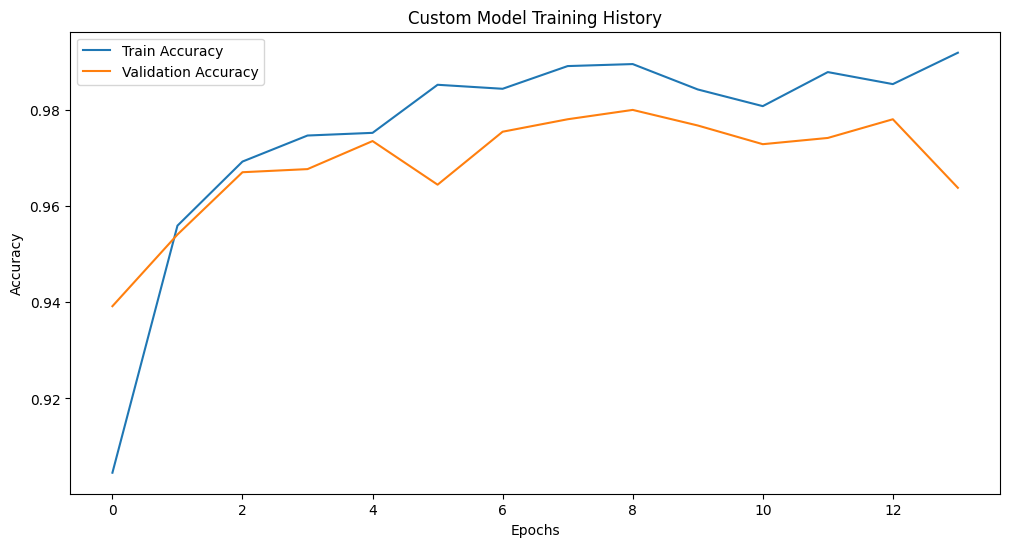

In [49]:
# Plot Training History
def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(custom_history, "Custom Model Training History")

In [50]:
custom_model.save('custom_model.h5')


In [67]:
# Import necessary libraries
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the trained model
trained_model = load_model('custom_model.h5')

# Use the same scaler from your training pipeline
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler to training data

# Initialize PCA to reduce features to 561
pca = PCA(n_components=561)
pca.fit(X_train)  # Fit PCA on training data

# Define activity labels (adjust based on your dataset)
activity_labels = {
    0: "Walking",
    1: "Running", #
    2: "Sitting", #
    3: "Standing", #
    4: "Lying Down",#
    5: "Climbing Stairs"
}

# Preprocess webcam frame
def preprocess_frame(frame, scaler, pca):
    """
    Preprocesses the webcam frame for the model.
    - Converts to grayscale.
    - Resizes the frame to ensure it produces exactly 561 features.
    - Flattens and scales the frame.
    - Reduces dimensions to 561 features using PCA.
    """
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the frame to a shape that matches the total number of input features
    resized_frame = cv2.resize(gray_frame, (23, 25))  # 23x25 = 575 features

    # Flatten the frame
    flat_frame = resized_frame.flatten()[:561]  # Slice to ensure exactly 561 features
    flat_frame = flat_frame.reshape(1, -1)  # Reshape to (1, 561)

    # Scale using the StandardScaler
    scaled_frame = scaler.transform(flat_frame)

    # Reduce dimensions using PCA
    reduced_frame = pca.transform(scaled_frame)

    return reduced_frame

# Live testing with webcam
def live_test(model, scaler, pca):
    """
    Captures live video feed from the webcam and performs real-time activity recognition.
    """
    # Open the webcam
    cap = cv2.VideoCapture(0)  # 0 indicates the primary webcam
    print("Press 'q' to exit the live demo.")

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        try:
            # Preprocess the frame
            preprocessed_frame = preprocess_frame(frame, scaler, pca)

            # Predict activity
            prediction = model.predict(preprocessed_frame)
            predicted_class = np.argmax(prediction)
            activity = activity_labels[predicted_class]

            # Display the activity on the frame
            cv2.putText(frame, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        except Exception as e:
            # If preprocessing or prediction fails, display an error message
            cv2.putText(frame, "Error processing frame", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            print(f"Error: {e}")

        # Show the frame
        cv2.imshow('Live Activity Recognition', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Run the live test
live_test(trained_model, scaler, pca)


Press 'q' to exit the live demo.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━

<h2>2nd TRY

In [52]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [53]:
trained_model = load_model('custom_model.h5')


In [54]:
# Assuming X_train is your training data used for fitting scaler and PCA
scaler = StandardScaler()
scaler.fit(X_train)

pca = PCA(n_components=561)
pca.fit(X_train)


PCA(n_components=561)

In [55]:
activity_labels = {
    0: "Walking",
    1: "Walking Upstairs",
    2: "Walking Downstairs",
    3: "Sitting",
    4: "Standing",
    5: "Laying"
}


In [56]:
def preprocess_frame(frame, scaler, pca):
    """
    Preprocesses a webcam frame to match the model's input format.
    - Converts frame to grayscale.
    - Resizes and flattens the frame.
    - Normalizes pixel values.
    - Reduces dimensions to 561 features using PCA.
    """
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the frame to a consistent size (e.g., 23x25)
    resized_frame = cv2.resize(gray_frame, (23, 25))  # Ensure 575 features

    # Flatten the frame
    flat_frame = resized_frame.flatten()[:561]  # Slice to ensure exactly 561 features

    # Normalize pixel values (scaling to mean 0, variance 1)
    flat_frame = flat_frame / 255.0  # Normalize to [0, 1]
    flat_frame = flat_frame.reshape(1, -1)

    # Apply scaler (StandardScaler) and PCA to match the model input
    scaled_frame = scaler.transform(flat_frame)
    reduced_frame = pca.transform(scaled_frame)

    return reduced_frame


In [57]:
def live_test(model, scaler, pca, activity_labels):
    """
    Captures live webcam feed and performs real-time activity recognition.
    """
    cap = cv2.VideoCapture(0)  # Open the webcam
    print("Press 'q' to exit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        try:
            # Preprocess the frame
            preprocessed_frame = preprocess_frame(frame, scaler, pca)

            # Predict activity
            prediction = model.predict(preprocessed_frame)
            predicted_class = np.argmax(prediction)
            activity = activity_labels[predicted_class]

            # Display prediction on the video feed
            cv2.putText(frame, f"Activity: {activity}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        except Exception as e:
            # Display error message on the video feed
            cv2.putText(frame, "Error processing frame", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            print(f"Error: {e}")

        # Show the frame
        cv2.imshow('Live Activity Recognition', frame)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [66]:
live_test(trained_model, scaler, pca, activity_labels)


Press 'q' to exit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42m